In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
#collecting data
d_titles=pd.read_csv('Data/base_csv_final.csv')['Title'].to_dict()
l_data=[v for k, v in pd.read_parquet('Data/summary.parquet', engine='pyarrow').groupby('Id')]+[v for k, v in pd.read_parquet('Data/summary_2.parquet', engine='pyarrow').groupby('Id')]

In [26]:
#mean number of words
np.mean([len(df) for df in l_data])

np.float64(4841.666666666667)

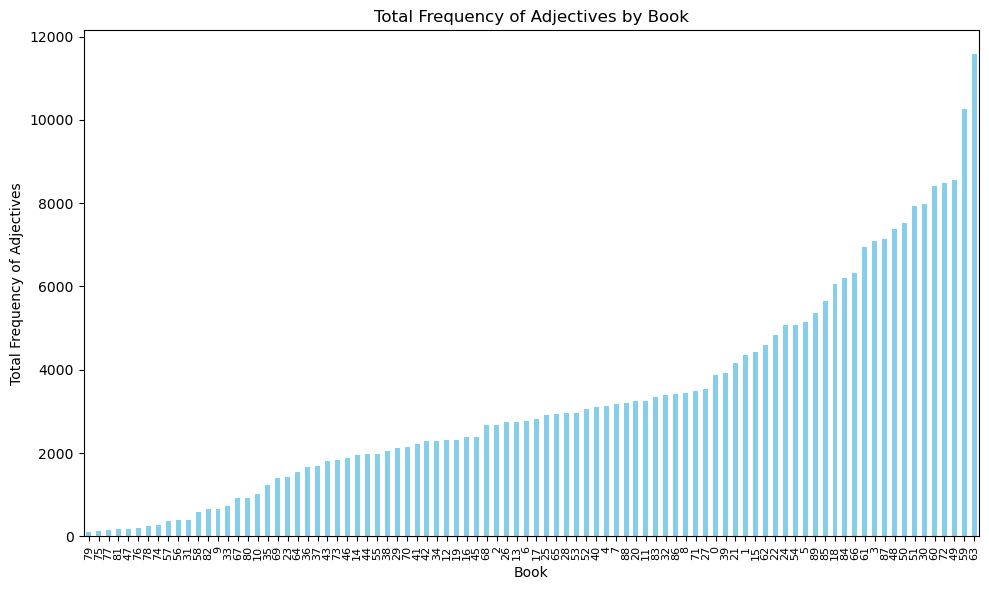

In [30]:
# Step 1: Combine the dataframes into a single dataframe
# Assuming each dataframe has columns: 'word', 'type', 'frequency'
combined_df = pd.concat(l_data, ignore_index=True)

# Step 2: Filter the combined dataframe to only include adjectives
# Assuming the 'type' column indicates the word type (e.g., 'ADJ' for adjectives)
adjectives_df = combined_df[combined_df['Type'] == 'adj']

# Step 3: Sum the frequency of adjectives for each book
# Assuming each dataframe has a 'book' column that identifies the book
# If not, you can add a column to each dataframe identifying the book before concatenation
adjectives_by_book = adjectives_df.groupby('Id')['Count'].sum()

# Step 4: Plot the results
plt.figure(figsize=(10, 6))

adjectives_by_book.sort_values().plot(kind='bar', color='skyblue')
#adjectives_dict = {d_titles.get(book_id, book_id): freq for book_id, freq in adjectives_by_book.items()}
#plt.bar(adjectives_dict.keys(), adjectives_dict.values(), color='skyblue')

# Customizing the plot
plt.title('Total Frequency of Adjectives by Book')
plt.xlabel('Book')
plt.ylabel('Total Frequency of Adjectives')
plt.xticks(rotation=90, ha='center',fontsize=8)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


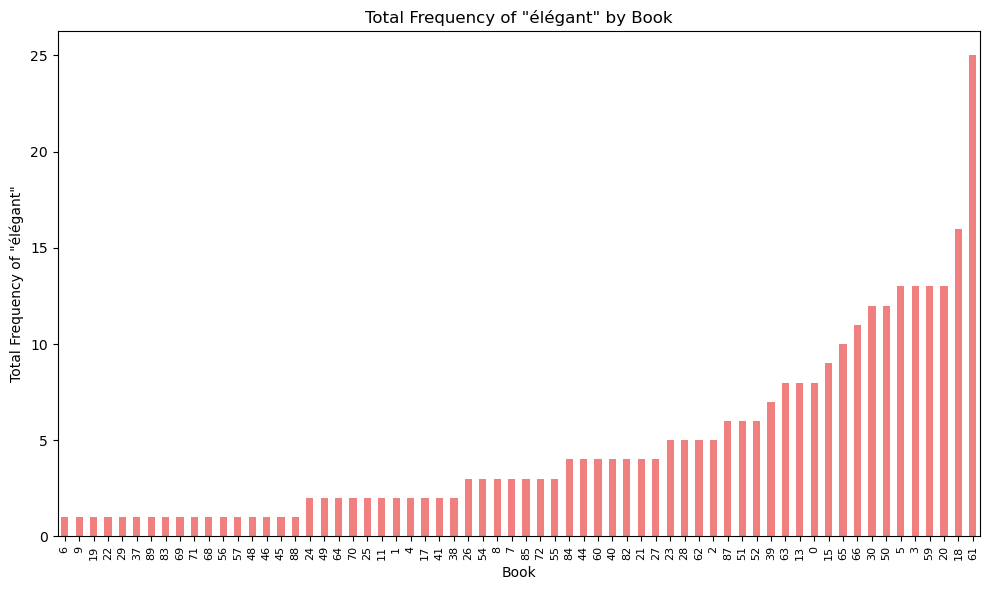

In [34]:
combined_df = pd.concat(l_data, ignore_index=True)

# Step 2: Filter the combined dataframe to only include the word "beautiful"
word_of_interest = "élégant"
word_df = combined_df[combined_df['Word'] == word_of_interest]

# Step 3: Sum the frequency of the word for each book
frequency_by_book = word_df.groupby('Id')['Count'].sum()

# Step 4: Plot the results
plt.figure(figsize=(10, 6))
frequency_by_book.sort_values().plot(kind='bar', color='lightcoral')

# Customizing the plot
plt.title(f'Total Frequency of "{word_of_interest}" by Book')
plt.xlabel('Book')
plt.ylabel(f'Total Frequency of "{word_of_interest}"')
plt.xticks(rotation=90, ha='center',fontsize=8)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


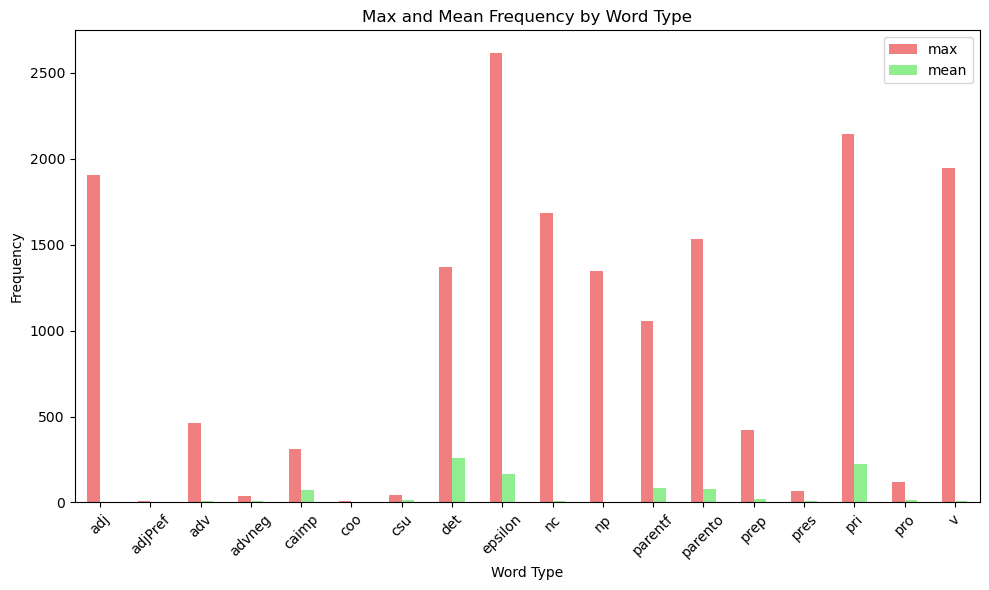

<Figure size 1000x600 with 0 Axes>

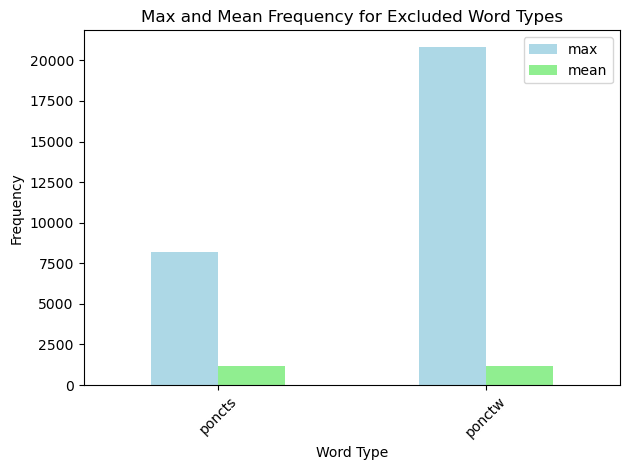

In [40]:
combined_df = pd.concat(l_data, ignore_index=True)

# Step 2: Group by word type and calculate min, max, and mean frequencies
type_stats = combined_df.groupby('Type')['Count'].agg(['max', 'mean'])

excluded_types = ['ponctw', 'poncts']

# Filter out the types you want to exclude from the main plot
filtered_type_stats = type_stats[~type_stats.index.isin(excluded_types)]

# Filter out the excluded types for separate plotting
excluded_type_stats = type_stats[type_stats.index.isin(excluded_types)]
# Step 3: Plot the results
filtered_type_stats.plot(kind='bar', figsize=(10, 6), color=['lightcoral', 'lightgreen'])

# Customizing the plot
plt.title('Max and Mean Frequency by Word Type')
plt.xlabel('Word Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

plt.figure(figsize=(10, 6))
excluded_type_stats.plot(kind='bar', color=['lightblue', 'lightgreen'])

plt.title('Max and Mean Frequency for Excluded Word Types')
plt.xlabel('Word Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot for excluded types
plt.show()